In [352]:
# Import pandas(for making data tables)
import pandas as pd
import numpy as np
from datetime import datetime

# Graphing modules
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from matplotlib import mlab as ml
import seaborn as sns

# Makes plots in notebook
%matplotlib inline

In [353]:
# Create a Dataframe (data from data.seattle.gov)
df = pd.read_csv('data/Seattle_Real_Time_Fire_911_Calls.csv', low_memory=False)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565472 entries, 0 to 565471
Data columns (total 7 columns):
Address            564567 non-null object
Type               565472 non-null object
Datetime           565472 non-null object
Latitude           564130 non-null object
Longitude          564106 non-null float64
Report Location    525792 non-null object
Incident Number    536439 non-null object
dtypes: float64(1), object(6)
memory usage: 30.2+ MB


In [355]:
df.shape

(565472, 7)

In [356]:
df = df[pd.notnull(df['Datetime'])]
df = df[pd.notnull(df['Longitude'])]
df = df[pd.notnull(df['Latitude'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564106 entries, 1 to 565471
Data columns (total 7 columns):
Address            564097 non-null object
Type               564106 non-null object
Datetime           564106 non-null object
Latitude           564106 non-null object
Longitude          564106 non-null float64
Report Location    524433 non-null object
Incident Number    535074 non-null object
dtypes: float64(1), object(6)
memory usage: 34.4+ MB


In [357]:
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
1,6900 37th Av S,Medic Response,11/09/2011 11:33:00 PM +0000,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166
2,N 50th St / Stone Way N,Aid Response,11/09/2011 11:32:00 PM +0000,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164
3,E John St / E Olive Way,Aid Response,11/09/2011 11:32:00 PM +0000,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165
4,611 12th Av S,Aid Response,11/09/2011 11:29:00 PM +0000,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162
5,4545 42nd Av Sw,Automatic Medical Alarm,11/09/2011 11:25:00 PM +0000,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161


In [358]:
# df = df.ix[1:]
# df.head()

In [359]:
# Type of 911 calls made with counts
df.groupby('Type').size()

Type
1RED 1 Unit                      5910
3RED - 1 +1 + 1                   326
4RED - 2 + 1 + 1                 1888
AFA4 - Auto Alarm 2 + 1 + 1      1104
AFAH - Auto Alarm Hazmat            1
ANTIB - Antibiotic Delivery         4
Activated CO Detector            1818
Aid Resp Infectious                48
Aid Response                   304802
Aid Response Freeway              715
Aid Response Yellow             11730
Aid Service                       120
Aircraft Crash                      3
Aircraft Standby                    5
Alarm Bell                       3054
Assault w/Weap 7 per Rule        1224
Assault w/Weapons 14               46
Assault w/Weapons, Aid             33
Assault w/Weapons- Aid            228
Auto Fire Alarm                 30029
Automatic Aid Dist 11               1
Automatic Fire Alarm False       2086
Automatic Fire Alarm Resd        8049
Automatic Fire Dist 11              3
Automatic Medical Alarm          7637
Bark Fire                        1172
Boat Fi

In [360]:
# Replace the spaces (missing date) in Latitude with NaN
df.Latitude = pd.to_numeric(df.Latitude, errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564106 entries, 1 to 565471
Data columns (total 7 columns):
Address            564097 non-null object
Type               564106 non-null object
Datetime           564106 non-null object
Latitude           564106 non-null float64
Longitude          564106 non-null float64
Report Location    524433 non-null object
Incident Number    535074 non-null object
dtypes: float64(2), object(5)
memory usage: 34.4+ MB


In [361]:
length = []
for dt in df.Datetime:
    if len(dt) not in length:
        length.append(len(dt))
length

[28, 25]

In [362]:
# Remove +0000
dt_list = []
for dt in df.Datetime:
    if 'T' in dt:
        dt_list.append(dt[:-5].strip())
    if 'AM' in dt or 'PM' in dt:
        dt_list.append(dt[:-6])

In [363]:
df['dt_crop'] =  dt_list
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop
1,6900 37th Av S,Medic Response,11/09/2011 11:33:00 PM +0000,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM
2,N 50th St / Stone Way N,Aid Response,11/09/2011 11:32:00 PM +0000,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM
3,E John St / E Olive Way,Aid Response,11/09/2011 11:32:00 PM +0000,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM
4,611 12th Av S,Aid Response,11/09/2011 11:29:00 PM +0000,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM
5,4545 42nd Av Sw,Automatic Medical Alarm,11/09/2011 11:25:00 PM +0000,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM


In [364]:
date_list = []
for time in df.dt_crop:
    if 'T' in time:
        date_list.append(time[:10])
    else:
        month = time[:2]
        day = time[3:5]
        year = time[6:10]
        date = year + "-" + month + '-' + day
        date_list.append(date)  

In [365]:
df['date'] = date_list
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date
1,6900 37th Av S,Medic Response,11/09/2011 11:33:00 PM +0000,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09
2,N 50th St / Stone Way N,Aid Response,11/09/2011 11:32:00 PM +0000,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09
3,E John St / E Olive Way,Aid Response,11/09/2011 11:32:00 PM +0000,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09
4,611 12th Av S,Aid Response,11/09/2011 11:29:00 PM +0000,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09
5,4545 42nd Av Sw,Automatic Medical Alarm,11/09/2011 11:25:00 PM +0000,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09


In [366]:
len(date_list)

564106

In [367]:
for time in df.dt_crop[0:50000]:
    if 'T' in time:
        print time [-8:]

24:59:00
24:24:00
24:12:00
24:00:00
24:59:00
24:43:00
24:43:00
24:26:00
24:13:00
24:12:00
24:46:00
24:38:00
24:24:00
24:01:00
24:50:00
24:44:00
24:20:00
24:00:00
24:56:00
24:13:00
24:57:00
24:32:00
24:28:00
24:07:00
24:05:00
24:55:00
24:46:00
24:42:00
24:24:00
24:12:00
24:24:00
24:08:00
24:43:00
24:24:00
24:10:00
24:45:00
24:33:00
24:32:00
24:17:00
24:14:00
24:05:00
24:00:00
24:52:00
24:43:00
24:12:00
24:01:00
24:55:00
24:46:00
24:23:00
24:07:00
24:42:00
24:42:00
24:18:00
24:08:00
24:38:00
24:27:00
24:22:00
24:13:00
24:04:00
24:51:00
24:27:00
24:24:00
24:39:00
24:38:00
24:37:00
24:15:00
24:07:00
24:07:00
24:06:00
24:36:00
24:21:00
24:13:00
24:51:00
24:32:00
24:25:00
24:35:00
24:04:00
24:23:00
24:16:00
24:05:00
24:28:00
24:53:00
24:38:00
24:34:00
24:27:00
24:23:00
24:49:00
24:25:00
24:14:00
24:05:00
24:01:00
24:34:00
24:30:00
24:18:00
24:01:00
24:57:00
24:53:00
24:33:00
24:10:00
24:04:00
24:44:00
24:15:00
24:13:00
24:12:00
24:05:00
24:46:00
24:43:00
24:33:00
24:22:00
24:18:00
24:17:00
2

In [368]:
time_list = []
for time in df.dt_crop:
    if 'A' in time:
        time = time[-11:-3]
        time_list.append(time)
    elif 'P' in time:
        hr = time[-11:-9]
        hr = int(hr) + 12
        hr = str(hr)
        time = hr + time[-9:-3]
        time_list.append(time)
    elif 'T' in time:
        time = time[-8:]
        time_list.append(time)

In [369]:
len(time_list)

564106

In [370]:
df['time'] = time_list
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time
1,6900 37th Av S,Medic Response,11/09/2011 11:33:00 PM +0000,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09,23:33:00
2,N 50th St / Stone Way N,Aid Response,11/09/2011 11:32:00 PM +0000,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09,23:32:00
3,E John St / E Olive Way,Aid Response,11/09/2011 11:32:00 PM +0000,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09,23:32:00
4,611 12th Av S,Aid Response,11/09/2011 11:29:00 PM +0000,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09,23:29:00
5,4545 42nd Av Sw,Automatic Medical Alarm,11/09/2011 11:25:00 PM +0000,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09,23:25:00


In [371]:
df['date2'] = pd.to_datetime(df.date)
df.time = pd.to_timedelta(df.time)
df.Datetime = df.date2 + df.time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564106 entries, 1 to 565471
Data columns (total 11 columns):
Address            564097 non-null object
Type               564106 non-null object
Datetime           564106 non-null datetime64[ns]
Latitude           564106 non-null float64
Longitude          564106 non-null float64
Report Location    524433 non-null object
Incident Number    535074 non-null object
dt_crop            564106 non-null object
date               564106 non-null object
time               564106 non-null timedelta64[ns]
date2              564106 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(6), timedelta64[ns](1)
memory usage: 51.6+ MB


In [372]:
# YES WE HAVE DATETIME!!!!

In [373]:
df.to_csv("./data/clean_seattle_911.csv")

In [288]:
import holidays

holid = holidays.UnitedStates()
holid

{}


In [11]:
df_dummies = pd.get_dummies(df.weekday, drop_first=True)

In [12]:
df = pd.concat([df, df_dummies], axis=1)

In [13]:
df.head()

,Unnamed: 0,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,...,weekday,mariners_home,seahawks_home,sounders_home,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,6900 37th Av S,Medic Response,2011-11-09 23:33:00,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09,...,Wednesday,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,N 50th St / Stone Way N,Aid Response,2011-11-09 23:32:00,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09,...,Wednesday,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,E John St / E Olive Way,Aid Response,2011-11-09 23:32:00,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09,...,Wednesday,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,611 12th Av S,Aid Response,2011-11-09 23:29:00,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09,...,Wednesday,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,4545 42nd Av Sw,Automatic Medical Alarm,2011-11-09 23:25:00,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09,...,Wednesday,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
df['night'] = ((df.time < '06:00:00') | (df.time > '20:00:00')).astype(int)
df[['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']] = \
df[['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']].astype(int)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,mariners_home,seahawks_home,sounders_home,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,night
0,6900 37th Av S,Medic Response,2011-11-09 23:33:00,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09,23:33:00,...,0,0,0,0,0,0,0,0,1,1
1,N 50th St / Stone Way N,Aid Response,2011-11-09 23:32:00,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,0,0,0,0,0,0,1,1
2,E John St / E Olive Way,Aid Response,2011-11-09 23:32:00,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,0,0,0,0,0,0,1,1
3,611 12th Av S,Aid Response,2011-11-09 23:29:00,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09,23:29:00,...,0,0,0,0,0,0,0,0,1,1
4,4545 42nd Av Sw,Automatic Medical Alarm,2011-11-09 23:25:00,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09,23:25:00,...,0,0,0,0,0,0,0,0,1,1


In [27]:
df.columns

Index([u'Address', u'Type', u'Datetime', u'Latitude', u'Longitude',
       u'Report Location', u'Incident Number', u'dt_crop', u'date', u'time',
       u'weekday', u'mariners_home', u'seahawks_home', u'sounders_home',
       u'Monday', u'Saturday', u'Sunday', u'Thursday', u'Tuesday',
       u'Wednesday', u'night'],
      dtype='object')

In [28]:
df.to_csv("./data/dummies_seattle_911.csv")

In [26]:
df_dum = pd.read_csv('./data/dummies_seattle_911.csv')
df_dum.drop(['Unnamed: 0'], axis=1, inplace=True)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564106 entries, 0 to 564105
Data columns (total 21 columns):
Address            564097 non-null object
Type               564106 non-null object
Datetime           547326 non-null object
Latitude           564106 non-null float64
Longitude          564106 non-null float64
Report Location    524433 non-null object
Incident Number    535074 non-null object
dt_crop            564106 non-null object
date               564106 non-null object
time               564106 non-null object
weekday            547326 non-null object
mariners_home      564106 non-null int64
seahawks_home      564106 non-null int64
sounders_home      564106 non-null int64
Monday             564106 non-null int64
Saturday           564106 non-null int64
Sunday             564106 non-null int64
Thursday           564106 non-null int64
Tuesday            564106 non-null int64
Wednesday          564106 non-null int64
night              564106 non-null int64
dtypes: float64

In [5]:
df_dum.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,mariners_home,seahawks_home,sounders_home,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,night
0,6900 37th Av S,Medic Response,2011-11-09 23:33:00,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09,23:33:00,...,0,0,0,0,0,0,0,0,1,1
1,N 50th St / Stone Way N,Aid Response,2011-11-09 23:32:00,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,0,0,0,0,0,0,1,1
2,E John St / E Olive Way,Aid Response,2011-11-09 23:32:00,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0,0,0,0,0,0,0,0,1,1
3,611 12th Av S,Aid Response,2011-11-09 23:29:00,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09,23:29:00,...,0,0,0,0,0,0,0,0,1,1
4,4545 42nd Av Sw,Automatic Medical Alarm,2011-11-09 23:25:00,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09,23:25:00,...,0,0,0,0,0,0,0,0,1,1


In [74]:
df_dum[pd.isnull(df_dum.Datetime) == True]

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,mariners_home,seahawks_home,sounders_home,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,night
109,10049 College Way N,Aid Response,NaN,47.701756,-122.335022,"(47.701756, -122.335022)",F110104009,2011-11-09T24:59:00,2011-11-09,24:59:00,...,0,0,0,0,0,0,0,0,0,1
110,5929 Beach Dr Sw,Aid Response,NaN,47.550431,-122.397816,"(47.550431, -122.397816)",F110104008,2011-11-09T24:24:00,2011-11-09,24:24:00,...,0,0,0,0,0,0,0,0,0,1
111,12035 Aurora Av N,Aid Response,NaN,47.716784,-122.344888,"(47.716784, -122.344888)",F110104006,2011-11-09T24:12:00,2011-11-09,24:12:00,...,0,0,0,0,0,0,0,0,0,1
113,2720 E Madison St,Medic Response,NaN,47.623153,-122.296667,"(47.623153, -122.296667)",F110104004,2011-11-09T24:00:00,2011-11-09,24:00:00,...,0,0,0,0,0,0,0,0,0,1
205,2806 S Lilac St,Aid Response,NaN,47.567257,-122.297433,"(47.567257, -122.297433)",F110103872,11/09/2011 12:56:00 PM,2011-11-09,24:56:00,...,0,0,0,0,0,0,0,0,0,1
206,14th Av E / E Denny Way,Aid Response,NaN,47.618788,-122.314299,"(47.618788, -122.314299)",F110103871,11/09/2011 12:52:00 PM,2011-11-09,24:52:00,...,0,0,0,0,0,0,0,0,0,1
207,301 NE NORTHGATE WAY,Medic Response,NaN,47.708611,-122.325941,"(47.708611, -122.325941)",F110103870,11/09/2011 12:47:00 PM,2011-11-09,24:47:00,...,0,0,0,0,0,0,0,0,0,1
208,4412 Letitia Av S,Aid Response,NaN,47.563714,-122.289252,"(47.563714, -122.289252)",F110103868,11/09/2011 12:38:00 PM,2011-11-09,24:38:00,...,0,0,0,0,0,0,0,0,0,1
209,4232 S Frontenac St,Aid Response,NaN,47.539778,-122.279599,"(47.539778, -122.279599)",F110103867,11/09/2011 12:34:00 PM,2011-11-09,24:34:00,...,0,0,0,0,0,0,0,0,0,1
311,2260 1st Av S,Aid Response,NaN,47.583347,-122.334199,"(47.583347, -122.334199)",F110103709,2011-11-08T24:59:00,2011-11-08,24:59:00,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df_date = df_dum.groupby(by='date').Latitude.count()

In [24]:
df_date.head()

date
2010-06-29    189
2010-06-30    196
2010-07-01    227
2010-07-02    242
2010-07-03    212
Name: Latitude, dtype: int64

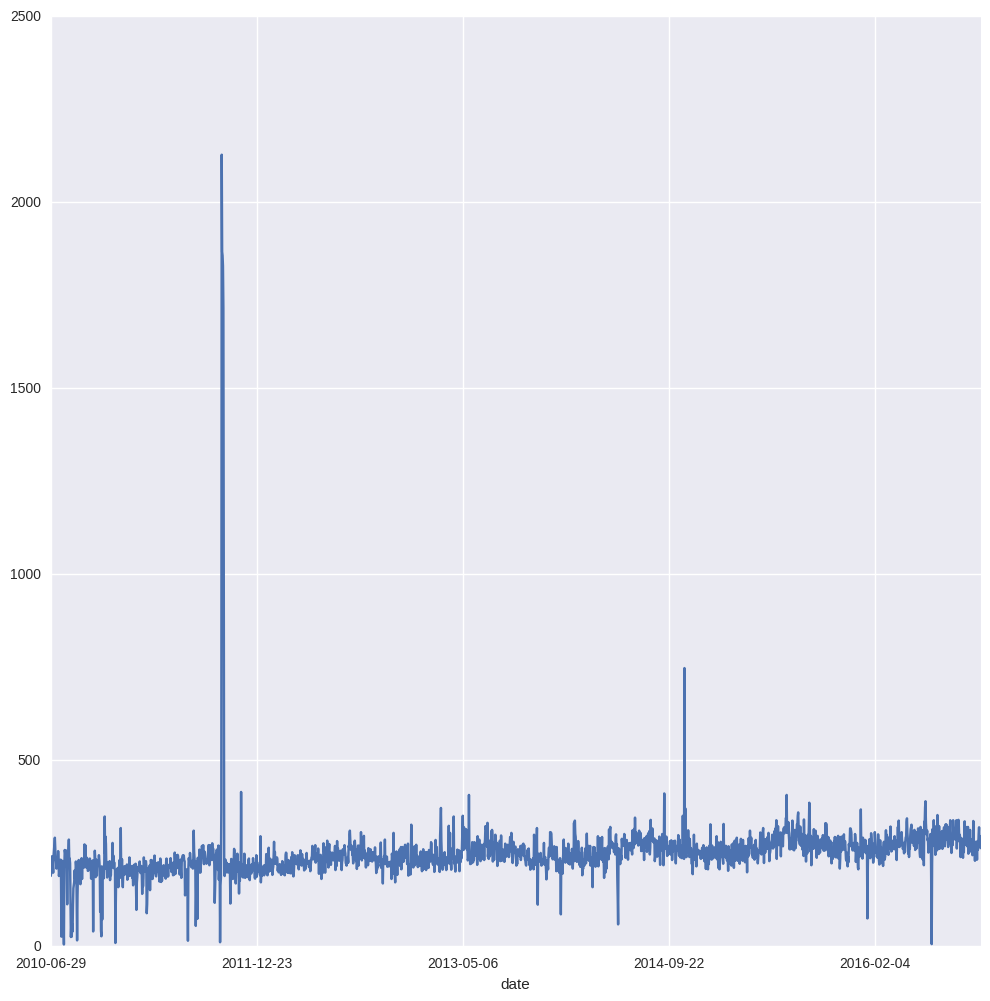

In [25]:
plt.figure(figsize=(12,12))
df_date.plot()

In [11]:
df_group.argmax()

'2011-09-29'

In [65]:
df_dum[df_dum.date == '2011-09-29']

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,mariners_home,seahawks_home,sounders_home,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,night
15743,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15744,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15745,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15746,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15747,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15748,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15749,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15750,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15751,2800 Western Av,Auto Fire Alarm,2011-09-29 23:58:00,47.615689,-122.352409,NaN,F110091047,09/29/2011 11:58:00 PM,2011-09-29,23:58:00,...,0,0,0,0,0,0,1,0,0,1
15752,9001 Lake City Way Ne,Aid Response,2011-09-29 23:57:00,47.693931,-122.305520,NaN,F110091046,09/29/2011 11:57:00 PM,2011-09-29,23:57:00,...,0,0,0,0,0,0,1,0,0,1


In [132]:
df_weekday = df_dum.groupby(by='weekday').Latitude.count()

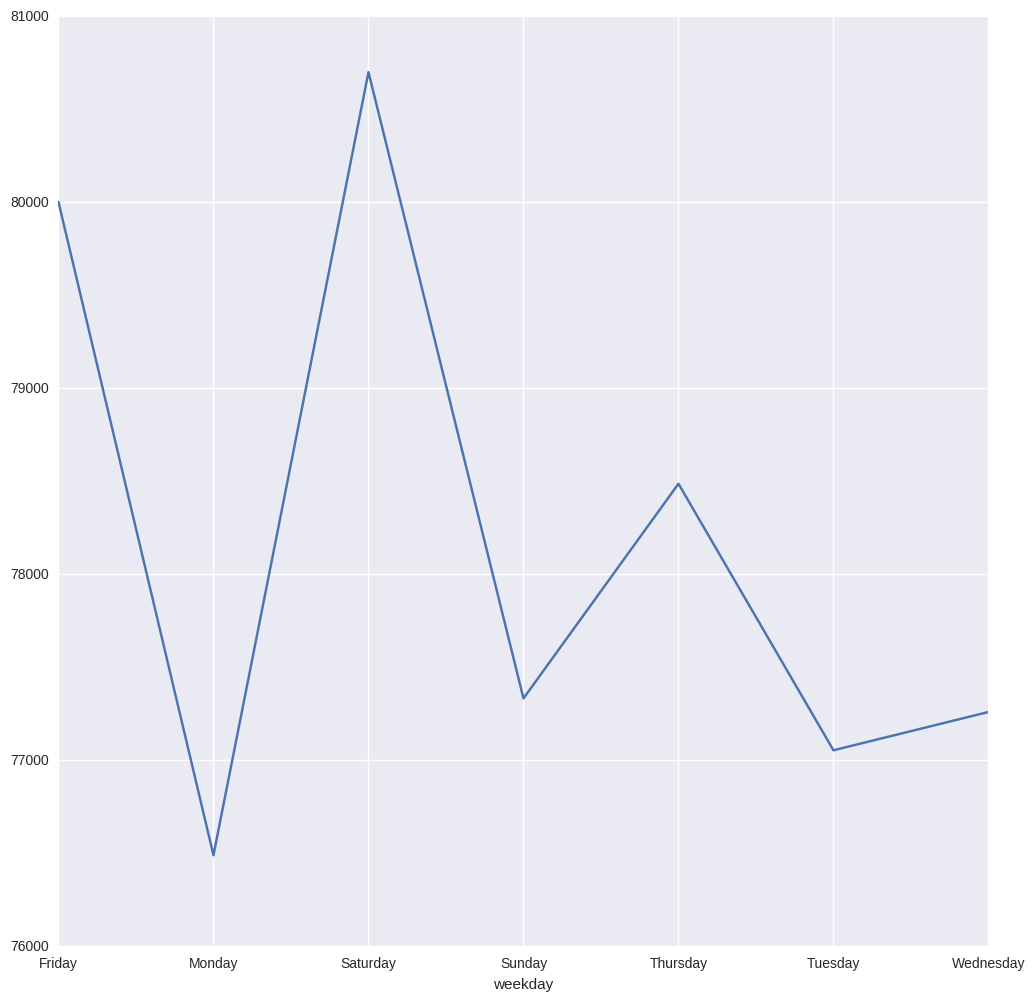

In [136]:
plt.figure(figsize=(12,12))
df_weekday.plot()